# Prompt Engineering with OpenAI

## Prompt Engineering Best Practices

- Crafting instructions to LLM to get desired responses.

    - **System** - Guides model behavior.

    - **User message** - Prompt from the User.
    - **Assistant** - Response to a Prompt.

#### Control Parameters
- `temperature` - Control answer randomness (0 = no random, 2 = high random)
- `max_tokens` - Desired response length

In [ ]:
import OpenAI

def get_response(prompt):
    client = OpenAI(api_key = "api_key")
    response = client.chat.completions.create(
        model = "gpt-3.5-turbo",
        messages=[{'role':'user','content':prompt}], # Insert more roles and prompts
        temperature=0)
    return response.choices[0].message.content

### Key Principles of Prompt Engineering

- Use of appropriate action verbse
- Detailed and precise instructions
- Well-structured delimited prompts

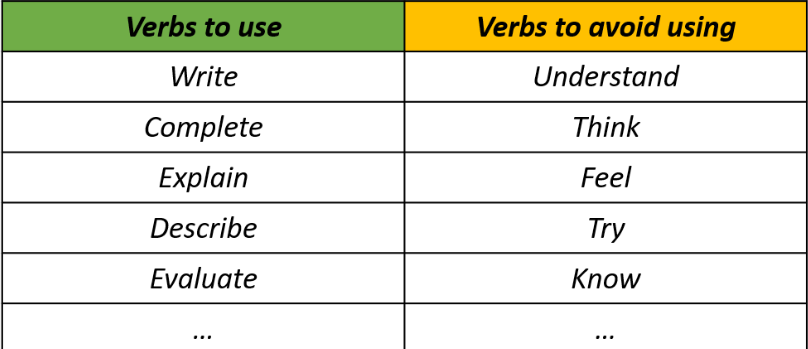

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")
story = "Once upon a time..."

# Create a prompt that completes the story
prompt = f"Complete the story delimited by triple backticks: ```{story}```"

# Get the generated response 
response = get_response(prompt)

print("\n Original story: \n", story)
print("\n Generated story: \n", response)

### Structured Outputs and Conditional Prompts

#### Tables
- Clearly mention the expected columns

#### Lists
- Helpful for enumerations

#### Structured paragraphs
- Mention structure requirements

#### Conditional Prompts
- Incorporate logic or conditions
- Follow an `if-else` style

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")
text = "Just give up..."

# Create the instructions
instructions = "Identify the language used and the number of sentences of the given text delimited by triple backticks. If the text contains more than one sentence, generate a sutiable title for it; otherwise write 'N/A'"

# Create the output format
output_format = "Include the text, language, number of sentences on separate lines prefixed by the following in single quotes repsectively: 'Text:' 'Language:' 'Title:'"

prompt = instructions + output_format + f"```{text}```"
response = get_response(prompt)
print(response)

## Advanced Prompt Engineering

### **Few-Shot Prompting**

- Model provided with question-answer pairs

    - **zero-shot** - Zero examples
    - **One-shot** - One example
    - **few-shot** - Few examples

In [ ]:
# Example of few-shot prompting
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response = client.chat.completions.create(
  model = "gpt-4o-mini",
  # Provide the examples as previous conversations
  messages = [{"role": "user", "content": "The product quality exceeded my expectations"},
              {"role": "assistant", "content": "1"},
              {"role": "user", "content": "I had a terrible experience with this product's customer service"},
              {"role": "assistant", "content": "-1"},
              # Provide the text for the model to classify
              {"role": "user", "content": "The price of the product is really fair given its features"}
             ],
  temperature = 0
)
print(response.choices[0].message.content)

### **Multi-step Prompting**

- Break down an end goal into series of steps

- Model goes through each step to give final output
    - Sequential tasks
    - Cognitive tasks

In [ ]:
# Craft a prompt to transform the text
prompt = f"""Transform the text delimited by triple backticks with the following two steps:
Step 1 - Proofread it without changing its structure
Step 2 - Change the tone to be formal and friendly
 ```{text}```"""

### **Chain-of-thought prompting**

- Requires LLMS to provide reasoning steps before giving answer.

- Used for xomplex reasoning tasks.
- Use **few-shot** prompts. Separate example prompt from question prompt.
- One unsuccessful prompt is an unsuccessful output.

### **Self-consistency Prompting**

- Generates multiple chain-of-thoughts by prompting the model several times.

- Majority vote to select the output.
- Done by prompt generating multiple responses.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create the chain-of-thought prompt
prompt = """
Q: Your father's age is twice the age of your friend. If your friend is 20 years old, how old is your father in 10 years?
A: Let's solve this problem step-by-step:
"""

response = get_response(prompt)
print(response)

In [ ]:

#* one-shot chain-of-thought prompts

# Define the example 
example = """Q: Sum the even numbers in the following set: {9,10,13,4,2}.
             A: Even numbers: 10,4,2. Adding them: 10+4+2=16"""

# Define the question
question = """Q: Sum the even numbers in {15,82,7,14}
              A:"""

# Create the final prompt
prompt = example + question

In [ ]:

#* Self-consistency prompt

# Create the self_consistency instruction
self_consistency_instruction = """
Instruction: Solve this problem by using three experts and combine the results with a majority vote.
"""

# Create the problem to solve
problem_to_solve = "If you own a store that sells laptops and mobile phones. You start your day with 50 devices in the store, out of which 60% are mobile phones. Throughout the day, three clients visited the store, each of them bought one mobile phone, and one of them bought additionally a laptop. Also, you added to your collection 10 laptops and 5 mobile phones. How many laptops and mobile phones do you have by the end of the day?"

# Create the final prompt
prompt = self_consistency_instruction + problem_to_solve

response = get_response(prompt)
print(response)

### **Iterative prompt-engineering**

- It's just giving a better prompt

## Prompt Engineering for Business Applications

### Text Summarization and Expansion

In [ ]:
# Craft a prompt to summarize the report
report = """Whatever"""
prompt = f"Summarize the report delimited by triple backticks in maximum of five sentences, focusing on aspects related to AI and data privacy: ```{report}```"

response = get_response(prompt)

print("Summarized report: \n", response)

In [ ]:
# Craft a prompt to summarize the product description
product_description = """Whatever"""

prompt = "Summarize the product description delimited in triple backticks, in NO MORE THAN FIVE (5) bullet points: ```{product_description}```"

response = get_response(prompt)

print("Original description: \n", product_description)
print("Summarized description: \n", response)

### Text Transformation

In [ ]:
# Craft a prompt that translates
prompt = "Translate the marketing message delimited in triple backticks from English to the following languages: French, Spanish, Japanese. ```{marketing_message}```"

### Code Generation and Explanation

In [ ]:
examples="""input = [10, 5, 8] -> output = 23
input = [5, 2, 4] -> output = 11
input = [2, 1, 3] -> output = 6
input = [8, 4, 6] -> output = 18
"""

# Craft a prompt that asks the model for the function
prompt = f""""
Infer the Python function that maps the inputs to the outputs shown in the example delimited by triple backticks: ```{examples}```
"""

In [ ]:
function = """def calculate_area_rectangular_floor(width, length):
					return width*length"""

# Craft a multi-step prompt that asks the model to adjust the function
prompt = f"""
Adjust the function delimited with triple backticks based on the following steps:

1. Test if the inputs to the function are positive
2. If the input is not positive, display appropriate error messages
3. Otherwise, return the area and perimeter of the rectangle

The function: ```{function}```
"""

## Prompt Engineering for Chatbot Development

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

def get_response(system_prompt, user_prompt):
  # Assign the role and content for each message
  messages = [{"role": "system", "content": system_prompt},
      		  {"role": "user", "content": user_prompt}]  
  response = client.chat.completions.create(
      model="gpt-4o-mini", messages= messages, temperature=0)
  
  return response.choices[0].message.content

# Try the function with a system and user prompts of your choice 
response = get_response("You are a chatbot that simply answers SKIBIDI or SIGMA to ANY question without context", "What is the square root of 4?")
print(response)

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

base_system_prompt = """
You are a customer support chatbot for an e-commerce platform. Your primary role is to assist users with their inquiries related to orders, products, and technical issues.
"""

# Define the order number condition
order_number_condition = """
Ask the user for their ORDER NUMBER if they submitted a query about an order without specifying an order number.
"""

# Define the technical issue condition
technical_issue_condition = """
For users reporting technical issues, always start your response with the phrase delimited in triple backticks: ```I'm sorry to hear about your issue with ```
"""

# Create the refined system prompt
refined_system_prompt = base_system_prompt + order_number_condition + technical_issue_condition

response_1 = get_response(refined_system_prompt, "My laptop screen is flickering. What should I do?")
response_2 = get_response(refined_system_prompt, "Can you help me track my recent order?")

print("Response 1: ", response_1)
print("Response 2: ", response_2)

### Role-playing prompts

In [ ]:
# Craft the system_prompt using the role-playing approach
system_prompt = """
Your role is a learning advisor who can receive your learner's background, experience, and goals, and accordingly, recommend a learning path of textbooks, including both beginner-level and more advanced options. 
"""

user_prompt = "Hello there! I'm a beginner with a marketing background, and I'm really interested in learning about Python, data analytics, and machine learning. Can you recommend some books?"

response = get_response(system_prompt, user_prompt)
print(response)


#* Additional prompt for refining chatbot behavior
# Define behavior guidelines
behavior_guidelines = "You may ask a user about their background, experience, and goals, whenever any of these is not provided"

# Define response guidelines
response_guidelines = "You can recommend NO MORE than THREE textbooks"

system_prompt = base_system_prompt + behavior_guidelines + response_guidelines
user_prompt = "Hey, I'm looking for courses on Python and data visualization. What do you recommend?"
response = get_response(system_prompt, user_prompt)
print(response)

### Incorporating External Context

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Define the system prompt
system_prompt = """
You are a customer support specialist for a delivery service. You respond in a GENTLE manner to customer questions.
"""

context_question = "What types of items can be delivered using MyPersonalDelivery?"
context_answer = "We deliver everything from everyday essentials such as groceries, medications, and documents to larger items like electronics, clothing, and furniture. However, please note that we currently do not offer delivery for hazardous materials or extremely fragile items requiring special handling."

# Add the context to the model
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "system", "content": system_prompt},
            {"role": "user", "content": context_question},
            {"role": "assistant", "content": context_answer },
            {"role": "user", "content": "Do you deliver furniture?"}])
response = response.choices[0].message.content
print(response)

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")
service_description = """
MyPersonalDelivery is a reliable and efficient delivery service that caters to a wide range of delivery needs. 
We specialize in delivering everyday essentials such as groceries, medications, and documents, as well as larger items like electronics, 
clothing, and furniture. Our service is designed to be user-friendly, allowing customers to easily schedule deliveries through our mobile app or website. 
We pride ourselves on our promptness, professionalism, and commitment to customer satisfaction. With MyPersonalDelivery, you can expect your items to be handled
with care and delivered on time, every time."""


# Define the system prompt
system_prompt = f"""
You are a customer support secialist for MyPersonalDelivery that responds to questions in a GENTLE manner. 
The description of the service is in the text delimited by triple backtics: ```{service_description}```
"""

user_prompt = "What benefits does MyPersonalDelivery offer?"

# Get the response to the user prompt
response = get_response(system_prompt,user_prompt)

print(response)